In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# %qtconsole

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

from IPython.display import display
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)
			
import pandas as pd
import numpy as np
from pathlib import Path		

import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import folium
# from folium.plugins import HeatMap
import branca

In [4]:
df = pd.read_csv(r'data/merged_date.csv', parse_dates = ['count_date'])
df.set_index('count_date', inplace = True)
df.drop_duplicates(inplace = True)
df.sort_index(inplace = True)
# display_all(df.head())
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27143 entries, 1974-07-12 to 2019-04-09
Data columns (total 4 columns):
road_name    27143 non-null object
adt          27143 non-null float64
latitude     27143 non-null float64
longitude    27143 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


# Exploratory analysis

In [5]:
df.shape

(27143, 4)

(array([2.2561e+04, 3.0340e+03, 9.2900e+02, 3.7400e+02, 1.8800e+02,
        2.9000e+01, 8.0000e+00, 1.1000e+01, 6.0000e+00, 3.0000e+00]),
 array([     0.,  19820.,  39640.,  59460.,  79280.,  99100., 118920.,
        138740., 158560., 178380., 198200.]),
 <a list of 10 Patch objects>)

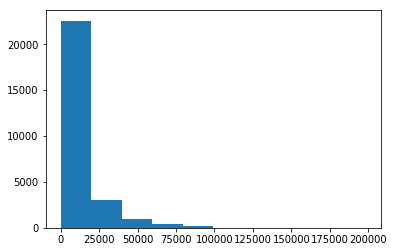

In [6]:
plt.hist(df.adt)

(array([  623.,   696.,   573.,   731.,   339.,   303.,  1523.,  3527.,
         7081., 11747.]),
 array([720816. , 722450.2, 724084.4, 725718.6, 727352.8, 728987. ,
        730621.2, 732255.4, 733889.6, 735523.8, 737158. ]),
 <a list of 10 Patch objects>)

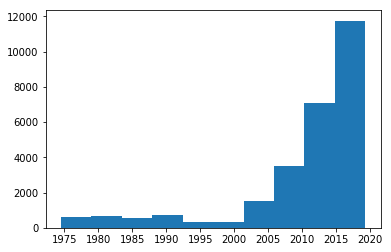

In [7]:
plt.hist(df.index)

(array([1447., 2008., 1525., 1806., 1442., 2693., 3225., 2364., 2624.]),
 array([733776.        , 734151.77777778, 734527.55555556, 734903.33333333,
        735279.11111111, 735654.88888889, 736030.66666667, 736406.44444444,
        736782.22222222, 737158.        ]),
 <a list of 9 Patch objects>)

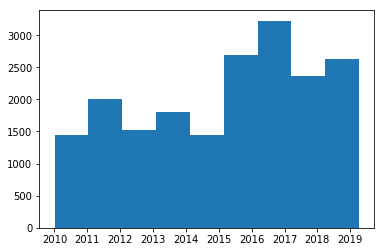

In [8]:
# get number of traffic records for each year after 2010
df_temp = df.copy()
df_temp = df_temp[df_temp.index >= '2010-01-01']
plt.hist(df_temp.index, bins = 9)


# def get_n_records(start_date, end_date):
#     return df[(df.index > start_date) & (df.index < end_date)].shape[0]
# for y in ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
# get_n_record('20')
# df[df.index]

In [9]:
# take a look at the coordinates
# branca.colormap.linear.YlOrRd_09
def create_visualization(df_, date_range_min_, date_rage_max_, col_, percentile = 80, radius = 10):
    # note that the color scale is only applied after the data is filtered by percentile
    df_ = df_.loc[date_range_min_:date_rage_max_]
    df_ = df_[df_[col_] > np.nanpercentile(df_[col_], percentile)]
    colorscale = branca.colormap.linear.YlOrRd_09.scale(0, max(df_[col_]))
    
    m = folium.Map(location = [-36.848461, 174.763336])  #show Auckland
    for long, lat, volume, road in zip(df_['longitude'], df_['latitude'], df_[col_], df_['road_name']):
        folium.CircleMarker(location=(lat, long),
                        popup = f'{road}:{volume}',
                        radius=radius,
                        color=colorscale(volume),
                        fill=True).add_to(m)
    cmap = colorscale.to_step(10)
    cmap.caption = '7 day average traffic count'
    cmap.add_to(m)
#     m.save('Auckland_map.html')
#    m._repr_html_()
    return m

In [10]:
m = create_visualization(df, '2018-01-01', '2019-12-31', 'adt', percentile = 90)
m

## Look at repeated sampling

In [11]:
df.reset_index(inplace = True)
df['count'] = df.groupby(['longitude', 'latitude'])['latitude'].transform('count')

(array([20181.,  3503.,  2682.,   253.,    42.,     0.,    92.,   102.,
          198.,    90.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

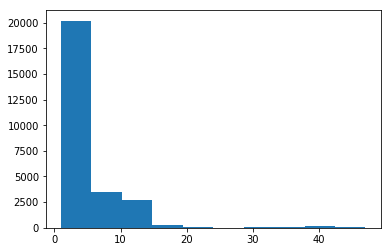

In [12]:
plt.hist(df['count'])

(array([9352., 2789., 2817.,  118.,   42.,    0.,   92.,  102.,  198.,
          90.]),
 array([ 2. ,  6.5, 11. , 15.5, 20. , 24.5, 29. , 33.5, 38. , 42.5, 47. ]),
 <a list of 10 Patch objects>)

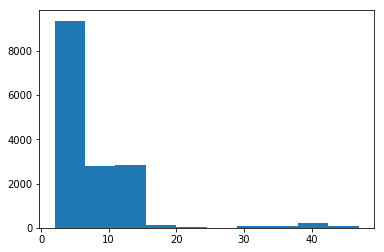

In [13]:
temp = df[(df['count']>1) & (df['count']<1000)]
plt.hist(temp['count'])

In [14]:
df['count'].unique()

array([ 3,  1,  5,  2,  7, 20, 10, 11, 22, 15, 14,  4, 12,  8,  6, 17,  9,
       18, 13, 16, 34, 41, 30, 47, 43, 31, 38, 39], dtype=int64)

In [47]:
df.shape

(27143, 6)

In [29]:
df.head()

,count_date,road_name,adt,latitude,longitude,count
0,1974-07-12,COLWILL RD,125.0,-36.832191,174.636777,3
1,1974-08-11,HOBSONVILLE RD,2853.0,-36.797016,174.650038,1
2,1974-08-11,GLORIA AVE,1823.0,-36.848881,174.650064,5
3,1974-08-11,HOBSONVILLE RD,2163.0,-36.814339,174.629872,2
4,1974-08-11,YEOVIL RD,2025.0,-36.844243,174.651030,7


## Look at time series of some coordinates

In [33]:
def get_df_sub_by_coord(df, long, lat):
    # get records of a certain coordinate
    return df[(df['longitude'] == long) & (df['latitude'] == lat)]
def plot_time_series(df, long, lat):
    temp = get_df_sub_by_coord(df, long, lat)
    plt.plot(temp['adt'])

In [42]:
coords = temp.groupby(['longitude', 'latitude']).size()

In [44]:
coords.index[0]

(174.61022463910638, -36.818311823118755)

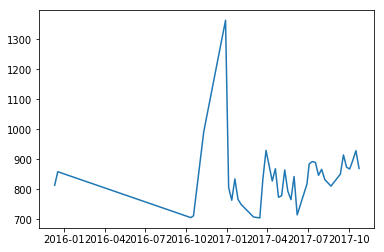

In [48]:
df_sub = get_df_sub_by_coord(df, coords.index[0][0], coords.index[0][1])
df_sub.sort_index()
plt.plot(df_sub['adt'])

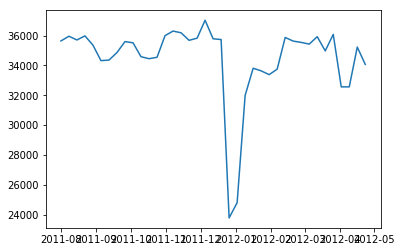

In [49]:
plot_time_series(df, coords.index[1][0], coords.index[1][1])
